### Librerías

In [1]:
import math
import os
import warnings
import pickle
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from datetime import datetime as dt

# import session_info
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

# Modelos
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Evaluación
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [3]:
random_seed = 333  # Semilla para reproducibilidad de resultados
np.random.seed(random_seed)  # Para reproducibilidad

In [4]:
df=pd.read_csv('./FIFA19-DS.csv')
df[:3]

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position
0,158023,31,94,94,110500000,565000,2202,5,4,4,...,28,26,6,11,15,14,8,Left,Lean,ST
1,20801,33,94,94,77000000,405000,2228,5,4,5,...,31,23,7,11,15,14,11,Right,Normal,ST
2,190871,26,92,93,118500000,290000,2143,5,5,5,...,24,33,9,9,15,15,11,Right,Lean,AM


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17140 entries, 0 to 17139
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17140 non-null  int64  
 1   Age                       17140 non-null  int64  
 2   Overall                   17140 non-null  int64  
 3   Potential                 17140 non-null  int64  
 4   Value                     17140 non-null  int64  
 5   Wage                      17140 non-null  int64  
 6   Special                   17140 non-null  int64  
 7   International Reputation  17140 non-null  int64  
 8   Weak Foot                 17140 non-null  int64  
 9   Skill Moves               17140 non-null  int64  
 10  Work Rate                 17140 non-null  int64  
 11  Height                    17140 non-null  float64
 12  Weight                    17140 non-null  int64  
 13  LS                        15298 non-null  float64
 14  ST    

In [6]:
df.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot',
       'Body Type', 'Position'],
      dtype='object')

# EDA

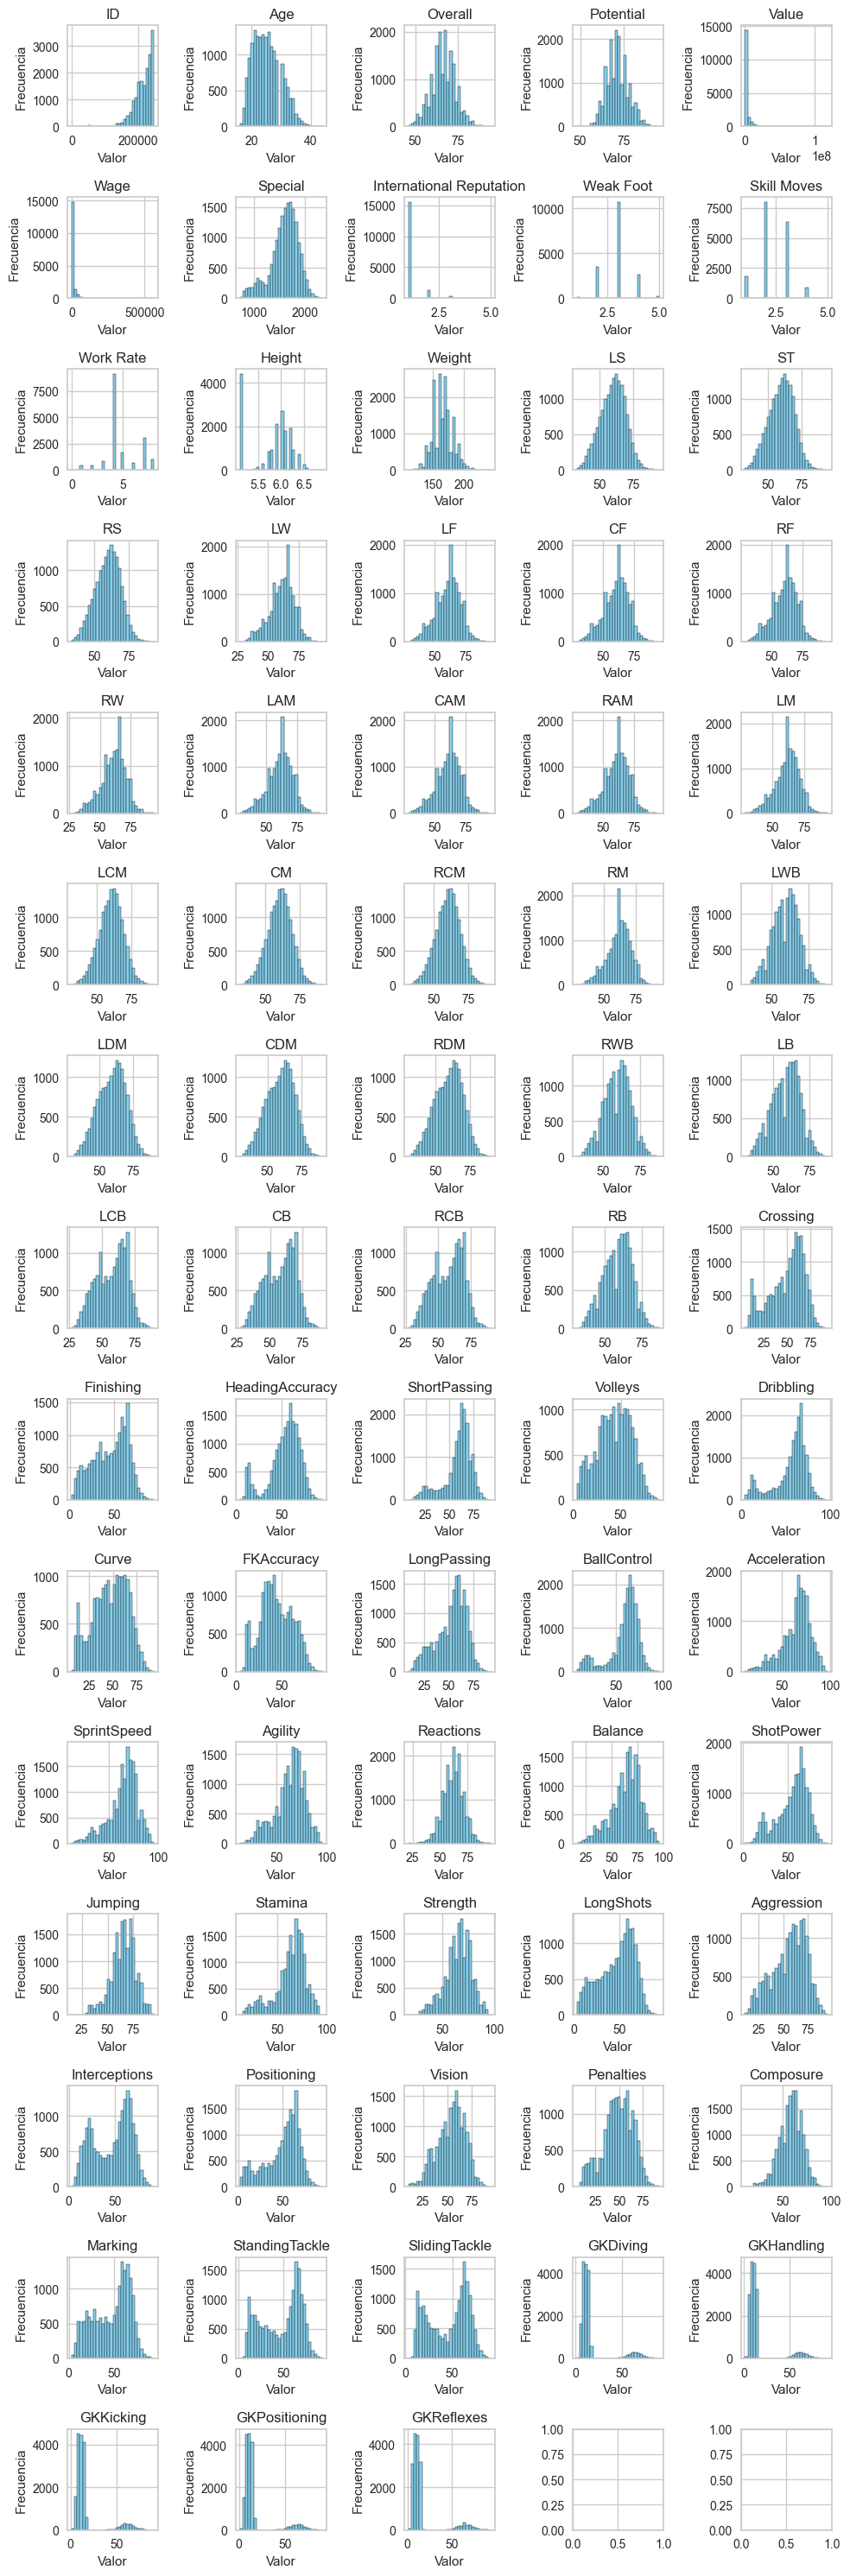

In [7]:
# Filtramos solo las columnas numéricas
selected_cols  = df.select_dtypes(include=np.number).columns

# Creamos los histogramas
fig, axes = plt.subplots(15, 5, figsize=(10, 30))
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

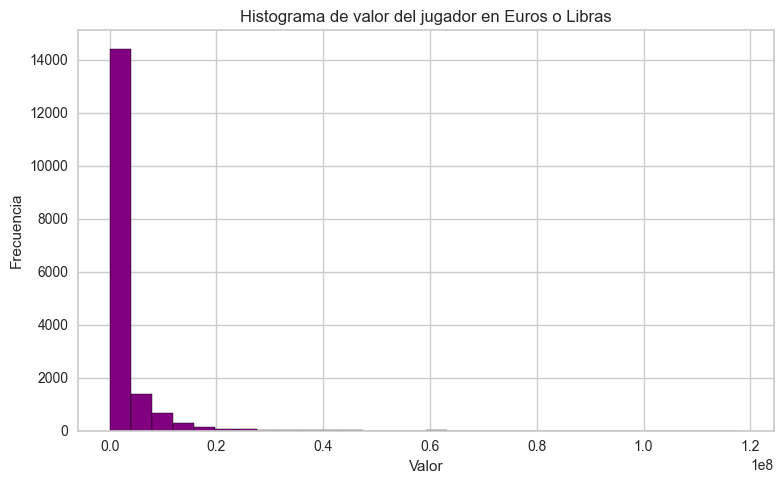

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Value'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Histograma de valor del jugador en Euros o Libras')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

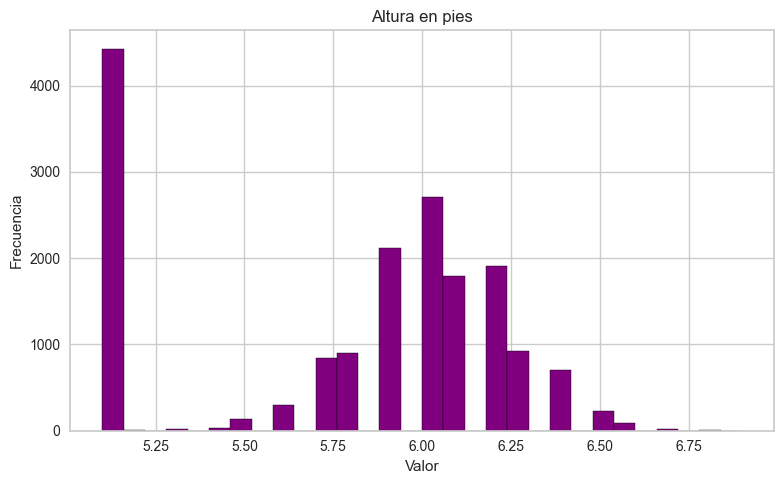

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['Height'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Altura en pies')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
selected_cols=['Age', 'Overall', 'Potential', 'Special','Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

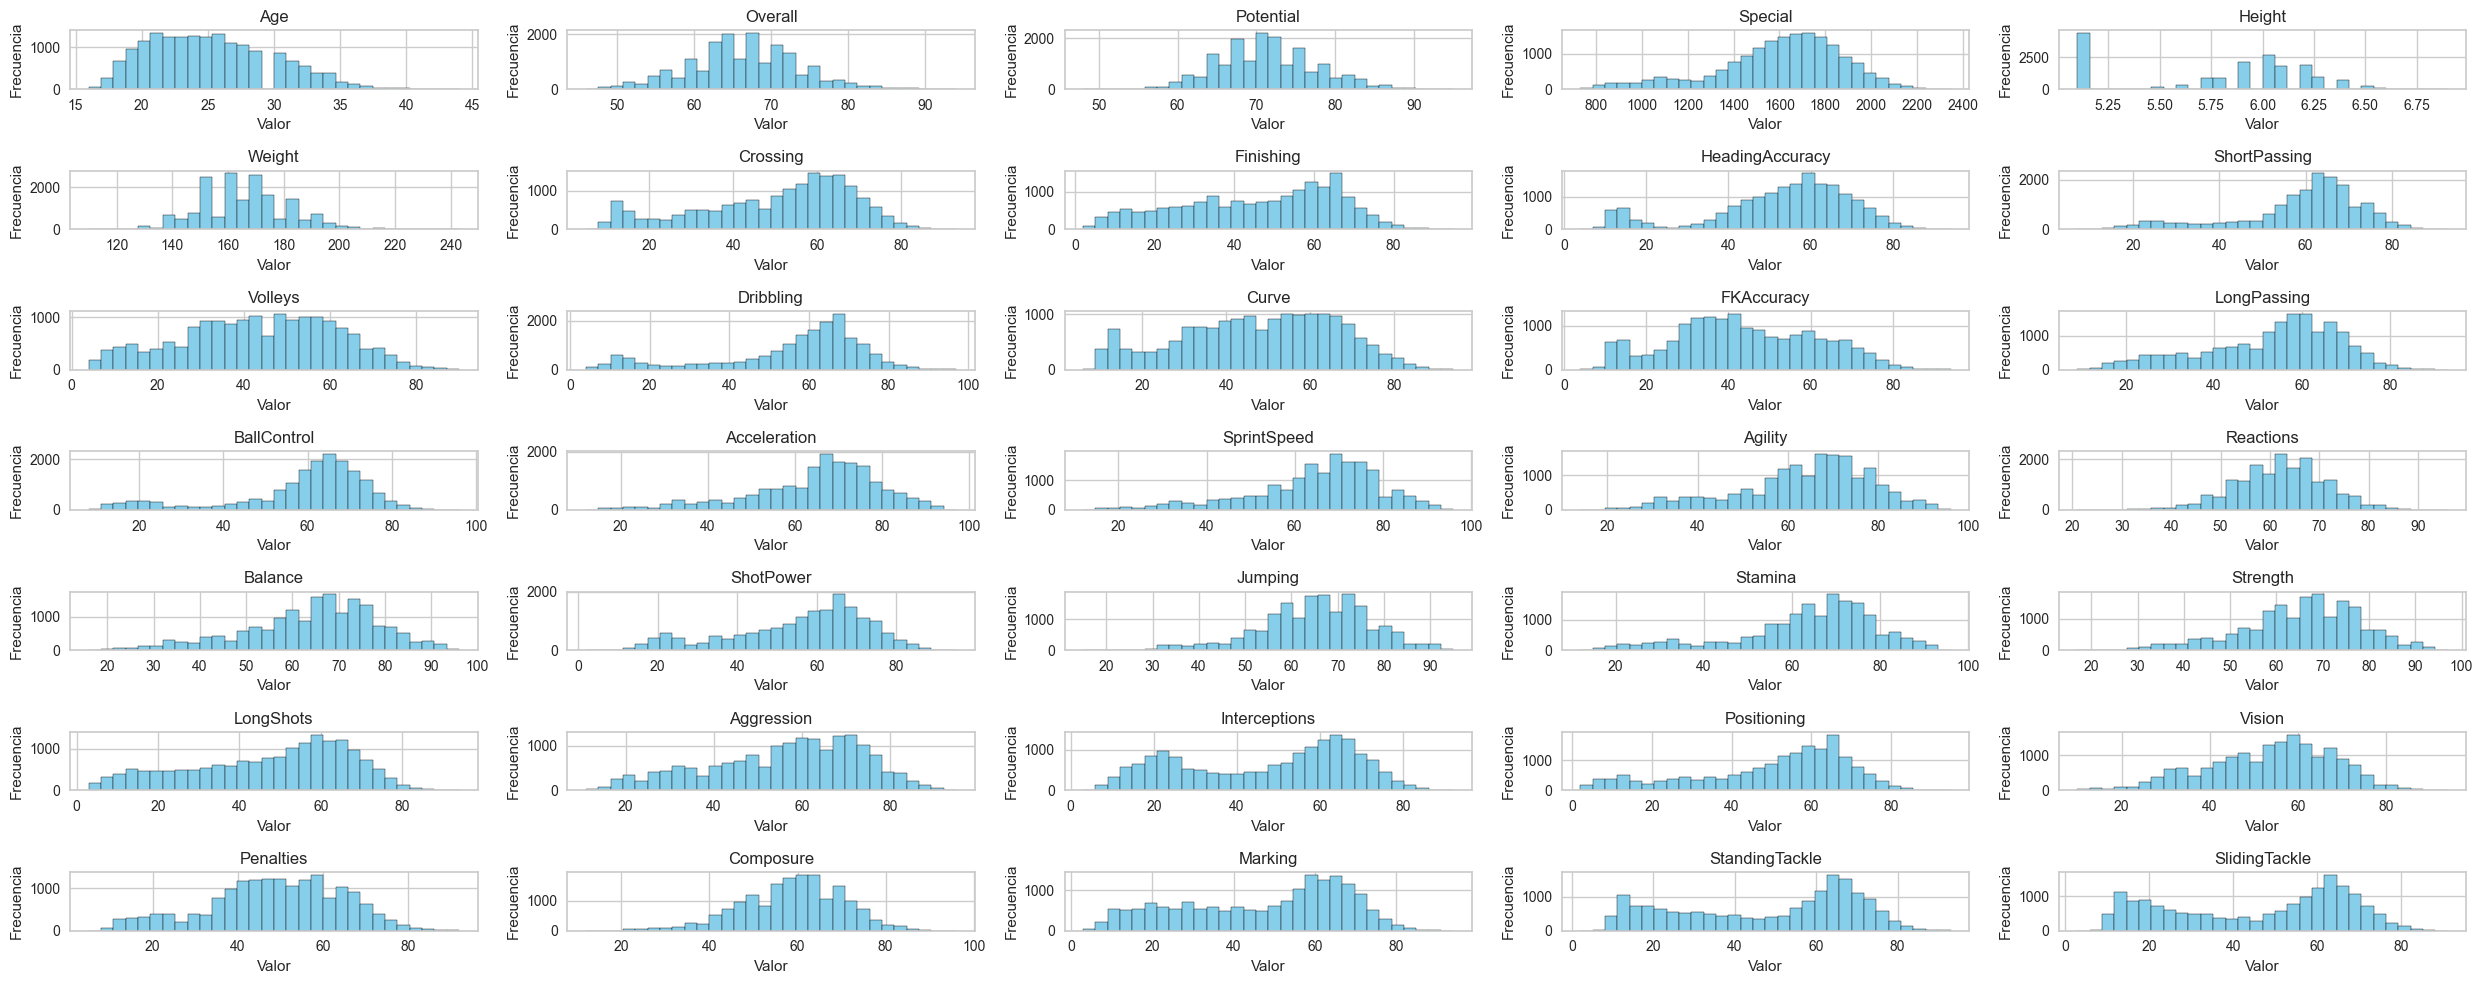

In [11]:
# Creamos los histogramas
fig, axes = plt.subplots(7, 5, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [12]:
df[selected_cols].describe()

,Age,Overall,Potential,Special,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.00000,17140.000000,17140.00000,17140.000000,...,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000
mean,25.150117,66.371937,71.386873,1604.909218,5.795376,165.956243,50.15811,45.875554,52.51937,59.045041,...,47.513069,56.179055,47.009918,50.339498,53.744866,48.779055,58.876196,47.538798,48.017853,45.951750
std,4.658667,6.925482,6.159271,272.616761,0.448955,15.545170,18.29100,19.455131,17.23845,14.596055,...,19.215724,17.285448,20.633220,19.427240,14.128352,15.653902,11.444560,19.835394,21.580262,21.217484
min,16.000000,46.000000,48.000000,731.000000,5.100000,110.000000,5.00000,2.000000,4.00000,7.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,21.000000,62.000000,67.000000,1465.000000,5.110000,154.000000,39.00000,30.000000,45.00000,54.000000,...,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,52.000000,30.000000,27.000000,24.000000
50%,25.000000,66.000000,71.000000,1644.000000,5.900000,165.000000,54.00000,49.000000,56.00000,63.000000,...,52.000000,59.000000,53.000000,55.000000,55.000000,50.000000,60.000000,53.000000,55.000000,52.000000
75%,28.000000,71.000000,75.000000,1793.000000,6.100000,176.000000,64.00000,62.000000,64.00000,68.000000,...,63.000000,70.000000,64.000000,65.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,44.000000,94.000000,95.000000,2346.000000,6.900000,243.000000,93.00000,95.000000,94.00000,93.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [13]:
df[selected_cols].corr()

,Age,Overall,Potential,Special,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Age,1.000000,0.448564,-0.251879,0.244527,0.048215,0.224107,0.140506,0.077654,0.156166,0.141413,...,0.163642,0.270062,0.203032,0.093370,0.191984,0.151322,0.393432,0.148438,0.124391,0.107543
Overall,0.448564,1.000000,0.665765,0.614396,0.035899,0.149917,0.404062,0.342392,0.345844,0.511048,...,0.429507,0.397204,0.322946,0.367179,0.507696,0.351520,0.732870,0.289453,0.253905,0.223829
Potential,-0.251879,0.665765,1.000000,0.387530,0.012372,-0.006587,0.249686,0.248120,0.200774,0.372684,...,0.271022,0.170319,0.153036,0.249446,0.354827,0.227208,0.444955,0.161729,0.141711,0.126860
Special,0.244527,0.614396,0.387530,1.000000,-0.295212,-0.264321,0.866002,0.724309,0.641022,0.906626,...,0.840378,0.664708,0.562026,0.824162,0.763469,0.734478,0.754339,0.561658,0.537619,0.505395
Height,0.048215,0.035899,0.012372,-0.295212,1.000000,0.450627,-0.367532,-0.278005,-0.044688,-0.274659,...,-0.289376,-0.066803,-0.072421,-0.333431,-0.271626,-0.257680,-0.098214,-0.082174,-0.075337,-0.080309
Weight,0.224107,0.149917,-0.006587,-0.264321,0.450627,1.000000,-0.389270,-0.286723,0.044696,-0.285851,...,-0.274405,0.034409,-0.024402,-0.344246,-0.281959,-0.246877,-0.033208,-0.047059,-0.045663,-0.055124
Crossing,0.140506,0.404062,0.249686,0.866002,-0.367532,-0.389270,1.000000,0.654329,0.464985,0.808561,...,0.741724,0.471664,0.428236,0.781534,0.685582,0.644885,0.578080,0.442197,0.427090,0.407844
Finishing,0.077654,0.342392,0.248120,0.724309,-0.278005,-0.286723,0.654329,1.000000,0.469594,0.661323,...,0.876295,0.241082,-0.019700,0.887508,0.696461,0.835966,0.535962,0.022542,-0.034391,-0.073617
HeadingAccuracy,0.156166,0.345844,0.200774,0.641022,-0.044688,0.044696,0.464985,0.469594,1.000000,0.635077,...,0.503008,0.689469,0.546165,0.530692,0.273979,0.546937,0.505946,0.578626,0.556714,0.529054
ShortPassing,0.141413,0.511048,0.372684,0.906626,-0.274659,-0.285851,0.808561,0.661323,0.635077,1.000000,...,0.761950,0.608668,0.542864,0.757175,0.716388,0.675776,0.687380,0.557857,0.538982,0.505921


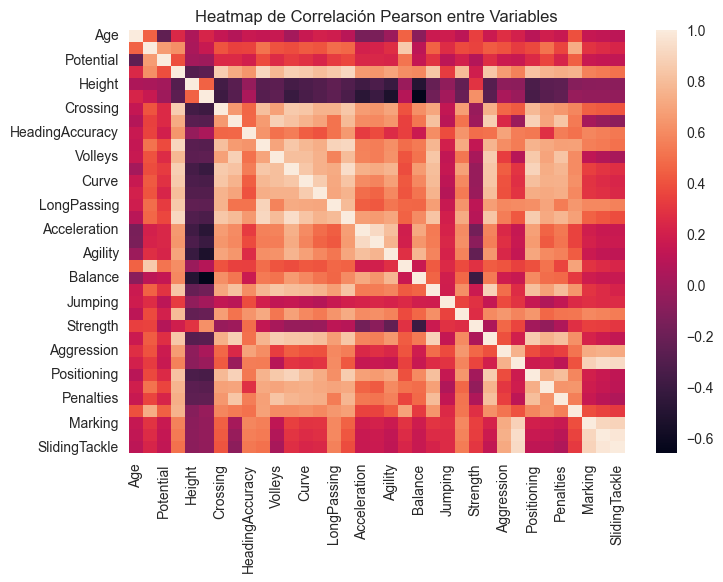

In [14]:
sns.heatmap(df[selected_cols].corr(),annot=False)
plt.title('Heatmap de Correlación Pearson entre Variables')
plt.show()

In [15]:
# Aquí queremos hacer dummie la variable de posición para reducir la dimensionalidad
dummies = pd.get_dummies(df['Position'], prefix='Position', dtype=float)

# Combinar con el DataFrame original
df = pd.concat([df, dummies], axis=1)

In [16]:
df[:3]

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,GKReflexes,Preferred Foot,Body Type,Position,Position_AM,Position_DF,Position_DM,Position_GK,Position_MF,Position_ST
0,158023,31,94,94,110500000,565000,2202,5,4,4,...,8,Left,Lean,ST,0.0,0.0,0.0,0.0,0.0,1.0
1,20801,33,94,94,77000000,405000,2228,5,4,5,...,11,Right,Normal,ST,0.0,0.0,0.0,0.0,0.0,1.0
2,190871,26,92,93,118500000,290000,2143,5,5,5,...,11,Right,Lean,AM,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
selected_cols=['Age', 'Overall', 'Potential', 'Special','Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','Position_AM', 'Position_DF', 'Position_DM',
       'Position_GK', 'Position_MF', 'Position_ST']

# Reducción de dimensionalidades

Dadas las características de la baja correlación entre las variables se optó por reducir la dimensionalidad por el método de Tsne

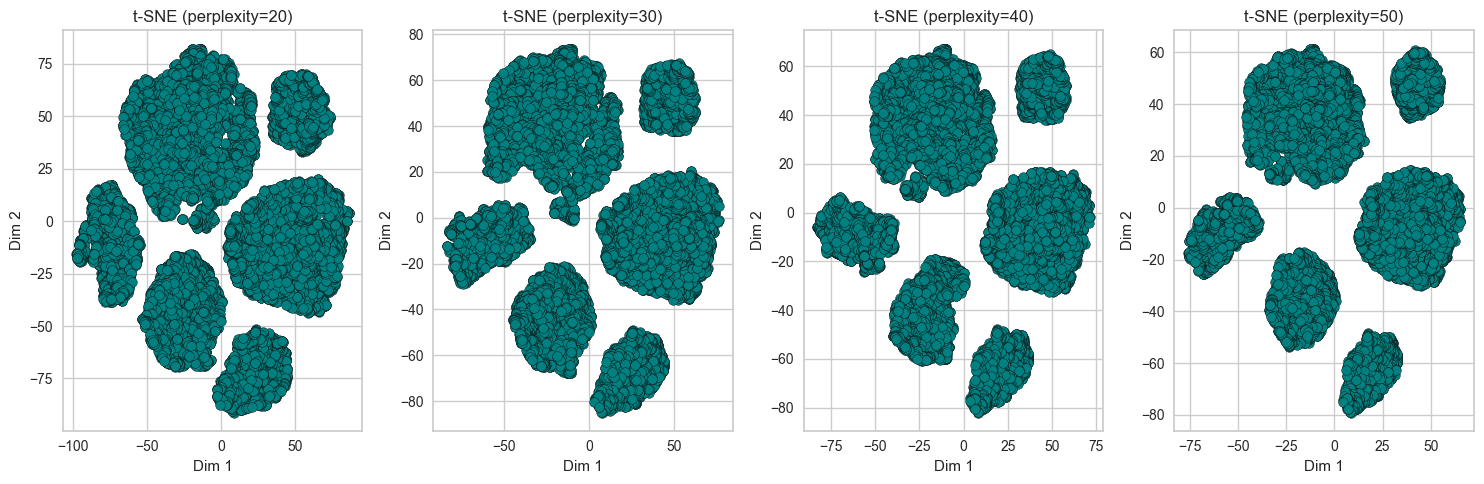

In [18]:
features = selected_cols
X = df[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

perplexities = [20, 30, 40, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(15,5))

for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, early_exaggeration=12, learning_rate='auto', random_state=random_seed)
    X_tsne = tsne.fit_transform(X_scaled)
    axes[i].scatter(X_tsne[:,0], X_tsne[:,1], c='teal', edgecolors='k')
    axes[i].set_title(f't-SNE (perplexity={perp})')
    axes[i].set_xlabel('Dim 1')
    axes[i].set_ylabel('Dim 2')

plt.tight_layout()
plt.show()

In [19]:
tsne 

TSNE(early_exaggeration=12, perplexity=50, random_state=333)

In [20]:
# Agregar componentes al DataFrame
df['tsne_1'] = X_tsne[:,0]
df['tsne_2'] = X_tsne[:,1]

# Filtrar pacientes alejados
df[:3]

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Body Type,Position,Position_AM,Position_DF,Position_DM,Position_GK,Position_MF,Position_ST,tsne_1,tsne_2
0,158023,31,94,94,110500000,565000,2202,5,4,4,...,Lean,ST,0.0,0.0,0.0,0.0,0.0,1.0,-1.736512,-27.792599
1,20801,33,94,94,77000000,405000,2228,5,4,5,...,Normal,ST,0.0,0.0,0.0,0.0,0.0,1.0,-2.654488,-26.200129
2,190871,26,92,93,118500000,290000,2143,5,5,5,...,Lean,AM,1.0,0.0,0.0,0.0,0.0,0.0,32.642120,-57.885979


# Pruebas para elegir el número de cluster

### Con la separación de los componentes tsne 1 y tsne 2, vemos un comportamiento esférico en los grupos, por tanto, procedemos a realizar la evaluación del número de clusters con kmeans

In [21]:
def score_plot(scores, range_n_clusters, operator, name_index):
    # Encontrar el número de conglomerados con la mejor puntuación
    clusters = list(range_n_clusters)

    if operator == 'max':
        operator = max(scores)
    elif operator == 'min':
        operator = min(scores)

    best_index = clusters[scores.index(operator)]
    best_score = max(scores)

    # Crear el gráfico de líneas para las puntuaciones
    fig = go.Figure()

    # Añadir la línea de puntuación
    fig.add_trace(go.Scatter(x=clusters, y=scores, mode='lines+markers', name=name_index))

    # Añade una línea de puntos para la mejor puntuación
    fig.add_trace(go.Scatter(x=[best_index, best_index], y=[0, best_score], mode='lines', name='Mejor Índice',
                            line=dict(color='red', width=2, dash='dot')))

    # Actualizar layout
    fig.update_layout(height=500, width=1200, title_text="", template='plotly_dark',
                    xaxis_title='Número de Clusters',
                    yaxis_title=name_index,
                    showlegend=True)
    fig.show()


def calculate_elbow_point(distortions):
    n_points = len(distortions)
    all_coords = np.vstack((range(n_points), distortions)).T
    first_point = all_coords[0]
    line_vec = all_coords[-1] - all_coords[0]
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    vec_from_first = all_coords - first_point
    scalar_product = np.sum(vec_from_first * np.tile(line_vec_norm, (n_points, 1)), axis=1)
    vec_from_first_parallel = np.outer(scalar_product, line_vec_norm)
    vec_to_line = vec_from_first - vec_from_first_parallel
    dist_to_line = np.sqrt(np.sum(vec_to_line ** 2, axis=1))
    return dist_to_line.argmax() + 1  # +1 para ajustar el índice al número real de clusters

def plot_elbow_method(no_clusters, distortions, optimal_k):

    # Crear el gráfico de líneas para las puntuaciones
    fig = go.Figure(data=go.Scatter(x=list(no_clusters), y=distortions, mode='lines+markers',
                                        marker=dict(color='RoyalBlue'), name='Distorsión por K'))

    # Añade una línea de puntos para la mejor puntuación
    fig.add_trace(go.Scatter(x=[optimal_k, optimal_k], y=[0, max(distortions)], mode='lines',
                                line=dict(color='Red', dash='dash'), name='Punto del Codo'))

    # Actualizar layout
    fig.update_layout(title='Método del Codo',
                        xaxis_title='Número de Clusters (K)',
                        yaxis_title='Distorsión', height=500, width=1200, template='plotly_dark')
    fig.show()

In [60]:
distortions = []; silhouette_scores = []
davies_bouldin_scores = []; calinski_harabasz_scores = []
range_n_clusters = range(2, 5)  # Ajustamos para explorar desde 2 hasta 4 clusters

for n_clusters in range_n_clusters:
   km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=random_seed)
   cluster_labels = km.fit_predict(X_scaled); distortions.append(km.inertia_)
   silhouette_ = silhouette_score(X_scaled, cluster_labels); silhouette_scores.append(silhouette_)
   davies_bouldin_ = davies_bouldin_score(X_scaled, cluster_labels); davies_bouldin_scores.append(davies_bouldin_)
   calinski_harabasz_ = calinski_harabasz_score(X_scaled, cluster_labels); calinski_harabasz_scores.append(calinski_harabasz_)

In [61]:
optimal_k = calculate_elbow_point(distortions)
plot_elbow_method(range_n_clusters, distortions, optimal_k)

In [62]:
score_plot(scores=silhouette_scores, range_n_clusters=range_n_clusters,
         operator='max', name_index = 'Índice de Silueta')

In [63]:
score_plot(scores=calinski_harabasz_scores, range_n_clusters=range_n_clusters,
         operator='max', name_index = 'Índice de C-H')

In [64]:
score_plot(scores=davies_bouldin_scores, range_n_clusters=range_n_clusters,
         operator='min', name_index = 'Índice de D-B')

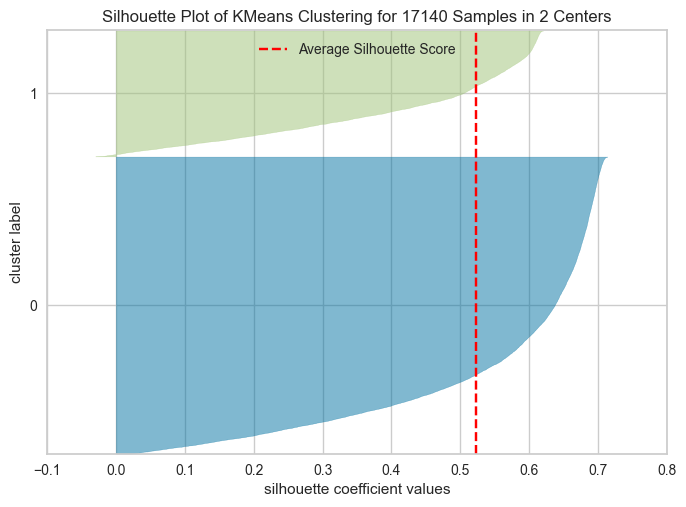

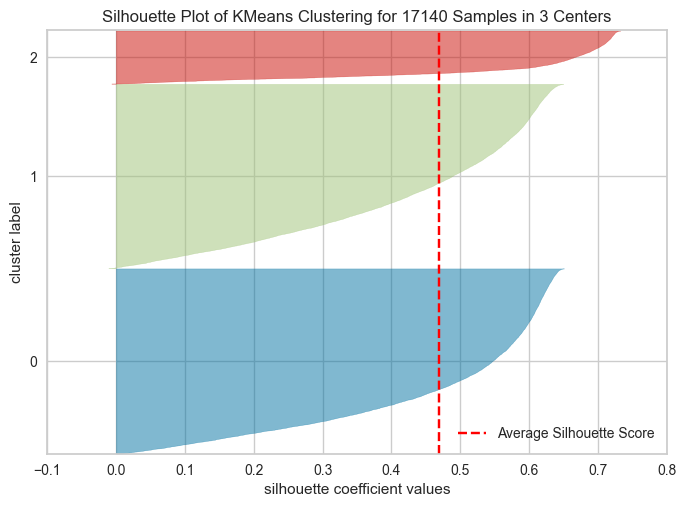

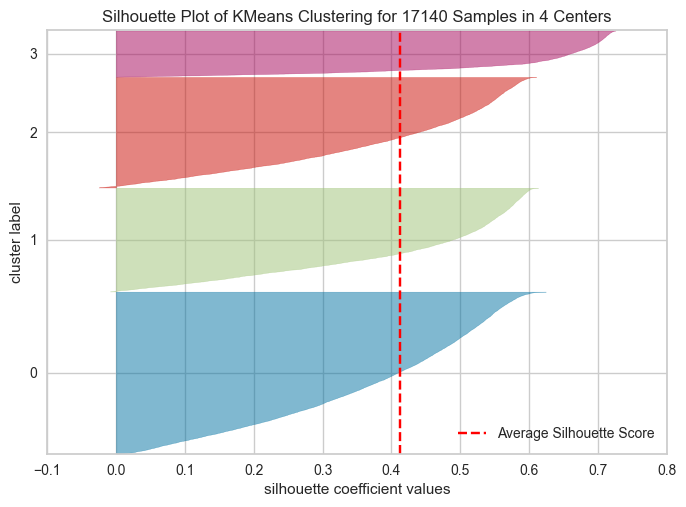

In [65]:
for i in range(2, 5):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=random_seed)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

# KMeans

In [68]:
# Generamos KMeans con 3 Clusters
km = KMeans(n_clusters=6, init='k-means++',n_init=10, max_iter=300, random_state=random_seed)
km.fit(X)

df['cluster'] = km.labels_

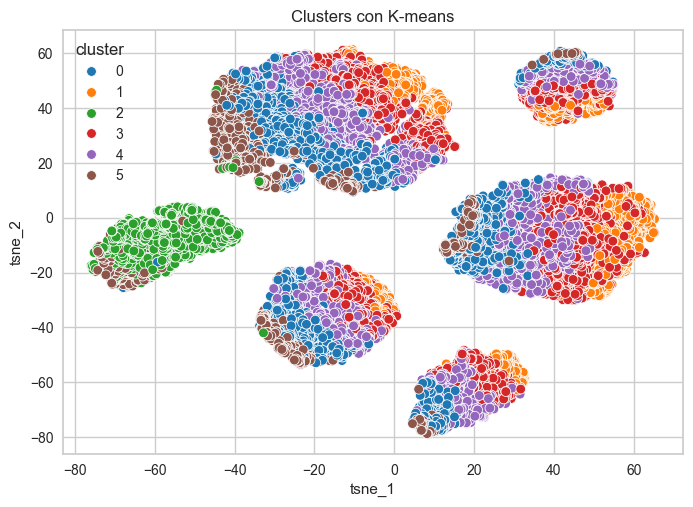

In [69]:
# Paso 5: Visualizar los clusters
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster', data=df, palette='tab10')
plt.title('Clusters con K-means')
plt.show()

# GMM

In [30]:
def score_plot(scores, range_n_clusters, operator, name_index):
    # Encontrar el número de conglomerados con la mejor puntuación
    clusters = list(range_n_clusters)

    if operator == 'max':
        operator = max(scores)
    elif operator == 'min':
        operator = min(scores)
        #
    best_index = clusters[scores.index(operator)]
    best_score = max(scores)

    # Crear el gráfico de líneas para las puntuaciones
    fig = go.Figure()

    # Añadir la línea de puntuación
    fig.add_trace(go.Scatter(x=clusters, y=scores, mode='lines+markers', name=name_index))

    # Añade una línea de puntos para la mejor puntuación
    fig.add_trace(go.Scatter(x=[best_index, best_index], y=[0, best_score], mode='lines', name='Mejor Índice',
                            line=dict(color='red', width=2, dash='dot')))

    # Actualizar layout
    fig.update_layout(height=500, width=1200, title_text="", template='plotly_dark',
                    xaxis_title='Número de Clusters',
                    yaxis_title=name_index,
                    showlegend=True)
    fig.show()

In [31]:
from sklearn.mixture import GaussianMixture

In [54]:
# Rango de número de clusters a evaluar
n_clusters = np.arange(2, 60)
bic_scores = []; aic_scores = []

# Ajustar GMM para cada número de clusters y calcular BIC y AIC
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=random_seed).fit(df[['tsne_1','tsne_2']])
    bic_scores.append(gmm.bic(df[['tsne_1','tsne_2']]))
    aic_scores.append(gmm.aic(df[['tsne_1','tsne_2']]))

In [55]:
score_plot(scores=bic_scores, range_n_clusters=n_clusters,
         operator='min', name_index = 'BIC')

In [56]:
score_plot(scores=aic_scores, range_n_clusters=n_clusters,
         operator='min', name_index = 'AIC')

In [77]:
# Generamos GMM con 5 Clusters
gmm = GaussianMixture(n_components=54, random_state=random_seed).fit(df[['tsne_1','tsne_2']])

# Predecir los clusters
clusters = gmm.predict(df[['tsne_1','tsne_2']])

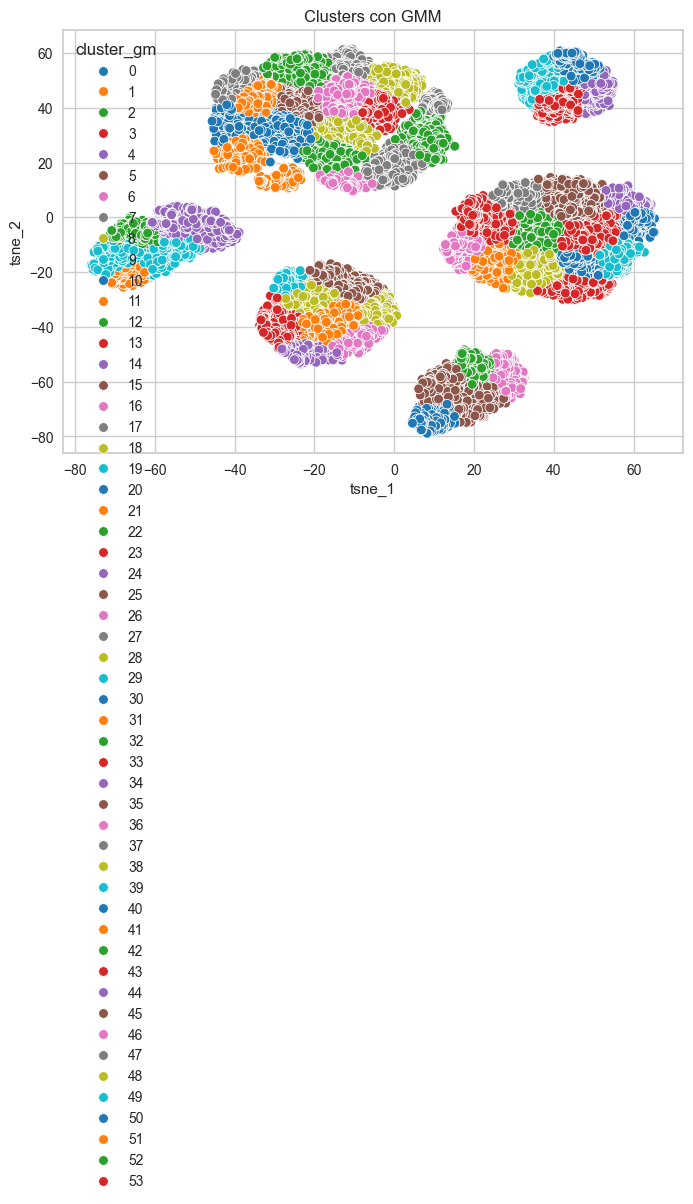

In [79]:
# Paso 5: Visualizar los clusters
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster_gm', data=df, palette='tab10')
plt.title('Clusters con GMM')
plt.show()

In [84]:
# Generamos GMM con 5 Clusters
gmm = GaussianMixture(n_components=6, random_state=random_seed).fit(df[['tsne_1','tsne_2']])

# Predecir los clusters
clusters = gmm.predict(df[['tsne_1','tsne_2']])
df['cluster_gm']=clusters 

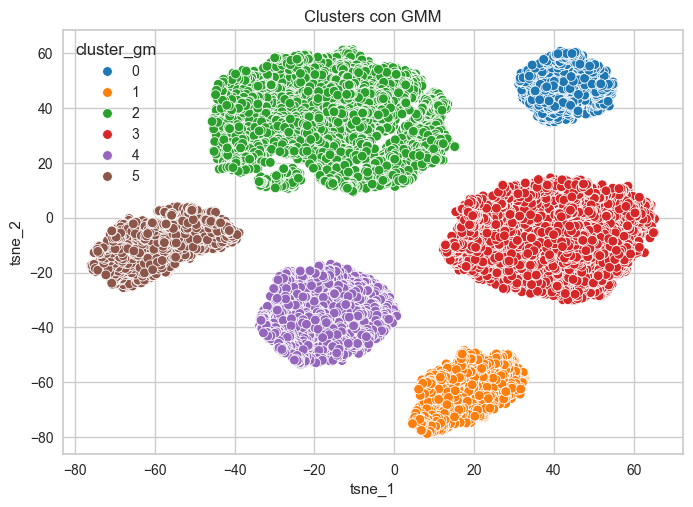

In [85]:
# Paso 5: Visualizar los clusters
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster_gm', data=df, palette='tab10')
plt.title('Clusters con GMM')
plt.show()

### 🧩 Justificación de la elección de 6 clusters frente a lo sugerido por BIC/AIC

Durante el modelado con **Gaussian Mixture Models (GMM)**, las métricas de información **BIC (Bayesian Information Criterion)** y **AIC (Akaike Information Criterion)** indicaron que el número “óptimo” de clusters estadísticamente podría rondar los **55 grupos**.  
Sin embargo, tras un análisis más profundo y una evaluación visual y conceptual, se decidió **reducir el número de clusters a 6**, basándose en los siguientes criterios:

1. **Interpretabilidad y coherencia futbolística**  
   - Aunque un número mayor de clusters puede optimizar métricas estadísticas, no necesariamente aporta **valor interpretativo**.  
   - En el contexto del fútbol, existen un número **limitado de roles funcionales** (portero, defensas, mediocampistas y delanteros, con sus variantes).  
   - Se identificaron **6 grupos bien diferenciados** que reflejan categorías reales y comprensibles dentro del juego.

2. **Claridad visual en la segmentación (t-SNE)**  
   - El mapa t-SNE muestra **separaciones nítidas y no solapadas** entre los seis clusters, lo que confirma que estos grupos capturan **estructuras naturales** en los datos.  
   - Aumentar el número de clusters a 55 generaría subdivisiones muy pequeñas y superpuestas, **dificultando la interpretación** y reduciendo la utilidad práctica del modelo.

3. **Balance entre precisión estadística y valor analítico**  
   - BIC/AIC penalizan la complejidad del modelo, pero en datasets grandes y multidimensionales tienden a favorecer **muchos clusters**.  
   - En cambio, el propósito del análisis no era maximizar el ajuste, sino **identificar perfiles de jugadores con significado táctico**.  
   - Por tanto, el modelo con 6 clusters logra un **buen compromiso entre ajuste y comprensión contextual.**

4. **Coherencia con la naturaleza del dominio**  
   - En fútbol, los jugadores tienden a agruparse naturalmente en **pocos roles estratégicos**, y una segmentación con 6 grupos se alinea con esta estructura jerárquica real.  
   - Los subgrupos que BIC/AIC detectan probablemente representan **variaciones individuales dentro de una misma posición**, más que verdaderas categorías nuevas.

---

### 🔍 Nota adicional: Subsegmentación futura
Como línea de trabajo complementaria, podría realizarse **un análisis de clustering dentro de cada grupo principal**, permitiendo una **exploración más profunda de especializaciones**.  
Por ejemplo:
- En el grupo de **delanteros (ST)**, podrían identificarse subgrupos de jugadores más efectivos en **tiros libres**, **juego aéreo** o **movilidad en el área**.  
- En los **mediocampistas (MF o AM)**, podrían distinguirse perfiles más **creativos**, **defensivos** o **distribuidores**.  

Esta segmentación jerárquica permitiría capturar diferencias más sutiles sin perder la **coherencia estructural general** que ofrece el modelo de 6 clusters.

---

📊 **Conclusión:**  
A pesar de que las métricas estadísticas sugerían un número mucho mayor de clusters, la elección de **6 grupos** fue la más adecuada al equilibrar **precisión técnica, interpretabilidad y relevancia contextual**.  
El resultado proporciona una segmentación **coherente, visualmente clara y conceptualmente significativa**, como se aprecia en el gráfico t-SNE, y deja abierta la posibilidad de un **análisis más granular** dentro de cada grupo.




# Caracterización

In [73]:
df[['cluster_gm','Age', 'Overall', 'Potential', 'Special','Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling']].groupby('cluster_gm').mean().reset_index()

,cluster_gm,Age,Overall,Potential,Special,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling
0,0,25.839080,67.477011,71.842672,1756.035920,5.712680,164.354167,53.933908,46.832615,57.705460,68.796695,45.235632,61.042385
1,1,24.262656,67.089339,72.942228,1704.704586,5.627088,156.075045,60.980345,60.757594,49.261465,66.048243,55.962478,69.108993
2,2,25.510315,66.489323,71.040355,1615.550851,5.851582,168.658342,51.533840,35.336229,61.085957,59.393775,35.883460,52.635541
3,3,24.511534,66.300357,71.650416,1732.281807,5.647030,158.693460,59.825922,55.760999,51.166468,66.506778,51.668252,66.365517
4,4,25.048077,66.462340,71.536859,1629.270433,5.809976,168.848157,47.959535,67.050481,63.292468,58.981571,58.623798,63.901442
5,5,25.953855,64.571661,69.859392,1044.030945,6.161515,180.728556,14.222041,11.945168,14.360478,27.298046,12.327362,13.784473


In [74]:
df[['cluster_gm','Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression']].groupby('cluster_gm').mean().reset_index()

,cluster_gm,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression
0,0,51.806034,50.015086,65.378592,65.870690,62.515805,61.856322,64.661638,64.586925,66.145115,62.512213,66.418822,71.766523,68.771552,54.743534,68.889368
1,1,60.721263,55.723049,59.535438,68.618225,73.960095,72.474092,74.257892,61.899345,73.683740,64.602144,60.070876,63.920786,56.403216,59.948779,50.083979
2,2,43.685849,39.087948,53.736156,57.875679,64.328447,65.319580,60.474665,61.745928,61.610387,51.672457,69.075461,68.190916,70.639703,39.919291,65.624321
3,3,57.605945,52.838763,61.560999,66.987634,71.459929,70.606183,71.823543,62.422354,71.864447,63.648276,63.007372,68.282045,60.798573,57.933650,57.009988
4,4,52.378606,45.349359,46.290865,64.808894,69.355369,70.336538,67.183494,62.714744,64.627003,66.808093,68.338542,64.645833,69.249199,60.157452,52.878205
5,5,14.644951,14.433225,25.815961,19.877307,38.138436,38.577633,39.907709,58.854506,42.900651,22.494571,57.521173,30.287731,60.631922,12.572747,26.369707


In [75]:
df[['cluster_gm','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle']].groupby('cluster_gm').mean().reset_index()

,cluster_gm,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,0,65.041667,53.219109,61.137213,51.653736,62.660920,63.556753,66.030891,62.666667
1,1,36.711733,62.817153,64.223347,58.174509,62.462180,38.397856,38.139369,35.948779
2,2,63.878393,44.178972,46.480275,43.609844,58.554470,63.978827,66.791893,65.104235
3,3,48.025922,60.375743,62.602854,54.961712,61.359810,48.959572,49.165279,46.533175
4,4,27.005609,65.962740,56.031651,63.172276,61.037660,29.891026,26.148638,23.536458
5,5,16.952226,11.190011,37.080890,19.932682,45.114007,15.116178,14.102063,14.027144


In [76]:
df[['cluster_gm','Position_AM', 'Position_DF', 'Position_DM','Position_GK', 'Position_MF', 'Position_ST']].groupby('cluster_gm').sum().reset_index()

,cluster_gm,Position_AM,Position_DF,Position_DM,Position_GK,Position_MF,Position_ST
0,0,0.0,0.0,1392.0,0.0,0.0,0.0
1,1,1679.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,5525.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,4205.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,2496.0
5,5,0.0,0.0,0.0,1842.0,0.0,0.0


###  Interpretación de los 6 Clusters – FIFA19

| Cluster | Descripción general | Posiciones dominantes | Perfil / Tipo de jugador |
|----------|--------------------|------------------------|--------------------------|
| **Cluster 0** | Jugadores con atributos equilibrados, buena defensa, fuerza y stamina. Destacan en intercepciones y tackles. | **DM – Mediocampistas defensivos** |  **Volantes de contención / mediocampistas defensivos.** Buen equilibrio físico y defensivo, clave para recuperar el balón. |
| **Cluster 1** | Jugadores rápidos y ágiles, con altas métricas de aceleración, agilidad y dribbling. Buen control y pase. | **AM – Mediocampistas ofensivos** |  **Mediapuntas / atacantes creativos.** Destacan por su movilidad, técnica y capacidad de generar jugadas. |
| **Cluster 2** | Alta capacidad defensiva, fuerza y tackling. Más lentos pero sólidos físicamente. | **DF – Defensores centrales y laterales** |  **Defensas físicos y consistentes.** Buenos en marcaje, tackles y posicionamiento defensivo. |
| **Cluster 3** | Jugadores equilibrados en atributos técnicos y físicos. Buen control de balón, pase y visión. | **MF – Centrocampistas mixtos** |  **Mediocampistas creativos / todoterreno.** Conectan defensa y ataque, manejan ritmo y posesión. |
| **Cluster 4** | Jugadores con alto nivel ofensivo: buen finishing, potencia de tiro y velocidad. | **ST – Delanteros** |  **Delanteros / atacantes de área.** Enfocados en la definición y movilidad en el último tercio. |
| **Cluster 5** | Valores bajos en atributos de campo, pero claramente diferenciados por altura, peso y estadísticas de portero. | **GK – Porteros** |  **Arquero / guardameta.** Segmento exclusivo de porteros, separados del resto por habilidades de GK. |
